<a href="https://colab.research.google.com/github/majorjeon/UTS_CitraDigital/blob/main/Transformasi_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drives/')

Mounted at /content/drives/


# Langkah 1: Import Library

In [2]:
# Import library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Langkah 2: Membaca Gambar

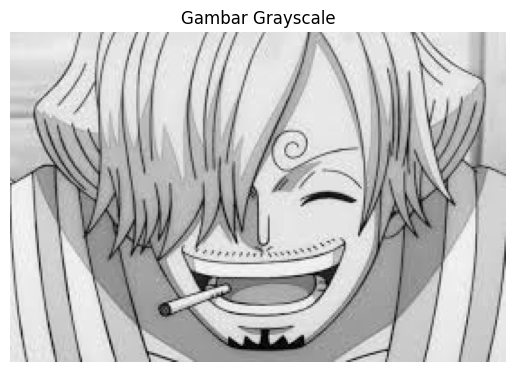

In [3]:
# Membaca citra grayscale
image_path = '/content/drives/MyDrive/sanji ganteng.jpeg'  # Ganti dengan path gambar kamu
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Periksa jika gambar berhasil dibaca
if image is None:
    raise ValueError("Gambar tidak dapat dibaca. Pastikan path gambar benar.")

# Menampilkan gambar asli
plt.imshow(image, cmap='gray')
plt.title("Gambar Grayscale")
plt.axis("off")
plt.show()


Citra dibaca dalam mode grayscale. `plt.imshow()` menampilkan citra dengan colormap `gray`.


# Langkah 3: Transformasi Fourier

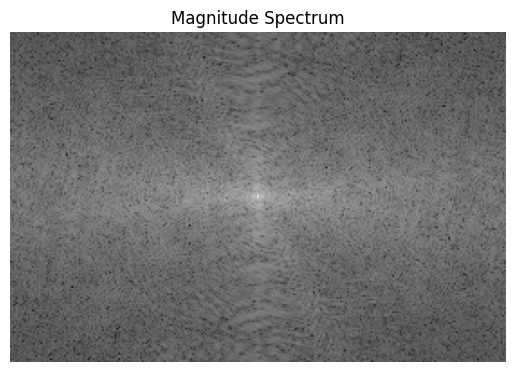

In [4]:
# Transformasi Fourier
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Magnitude Spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Menampilkan Magnitude Spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis("off")
plt.show()


* `cv2.dft()`: Menghitung Transformasi Fourier dari citra.
* `np.fft.fftshift()`: Menggeser frekuensi nol ke tengah spektrum.
* `cv2.magnitude()`: Menghitung magnitudo komponen real dan imajiner.
* `20 * np.log()`: Konversi nilai magnitudo ke skala log untuk visualisasi yang lebih jelas.


# Langkah 4: Inverse Transformasi Fourier

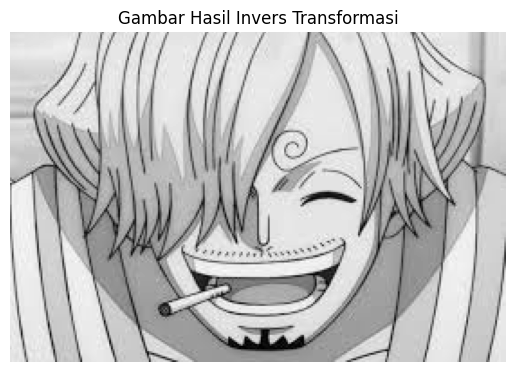

In [5]:
# Inverse Transformasi Fourier
idft_shift = np.fft.ifftshift(dft_shift)  # Menggeser kembali frekuensi nol
inverse_dft = cv2.idft(idft_shift)  # Inverse DFT
reconstructed_image = cv2.magnitude(inverse_dft[:, :, 0], inverse_dft[:, :, 1])

# Menampilkan gambar hasil invers transformasi
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Gambar Hasil Invers Transformasi")
plt.axis("off")
plt.show()


* `np.fft.ifftshift()`: Mengembalikan frekuensi nol ke posisi semula.
* `cv2.idft()`: Melakukan inverse Transformasi Fourier untuk mendapatkan kembali citra asli.
* `cv2.magnitude()`: Menghitung nilai absolut hasil inverse transformasi.


# Langkah 5: Perbandingan Citra Asli dan Rekontruksi

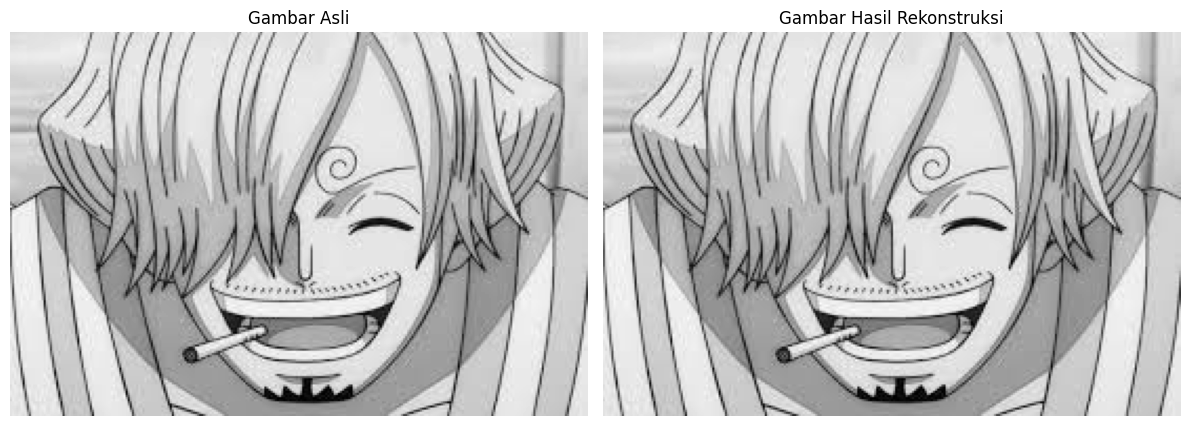

In [6]:
# Membandingkan citra asli dan hasil rekonstruksi
plt.figure(figsize=(12, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis("off")

# Gambar hasil rekonstruksi
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Gambar Hasil Rekonstruksi")
plt.axis("off")

plt.tight_layout()
plt.show()


* Dua subplot ditampilkan untuk membandingkan gambar asli dengan hasil inverse Transformasi Fourier.
* Gambar hasil rekonstruksi seharusnya mirip dengan gambar asli jika tidak ada perubahan di domain frekuensi.

# Penjelasan Informasi dari Magnitude Spectrum
1. **Magnitude Spectrum** menunjukkan distribusi energi frekuensi dalam citra:
* frekuensi rendah (dekat pusat): menyimpan informasi umum seperti area terang/gelap
* frekuensi tinggi (di tepi): menyimpan detail seperti tepi dan tekstur.

2. **Efek pada Citra**:
* penghilangan frekuensi rendah akan menghapus detail global.
* penghilangan frekuensi tinggi akan mengaburkan gambar